In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib.image as img
import matplotlib.cm as cm

testImage = img.imread('map.png') #map image used for long/lat plots


In [2]:
names = ['Epoch', 'Avg_Dose_Rate', "Avg_EQV_Dose_Rate","Sample_Collection_Time", "Longtitude", "Latitude","Altitude"]
issData = pd.read_csv("ISS_DOSANL_TEPC_58605.csv")
issData.columns = names
issData.head()

,Epoch,Avg_Dose_Rate,Avg_EQV_Dose_Rate,Sample_Collection_Time,Longtitude,Latitude,Altitude
0,2018-04-10T22:00:39.000Z,0.093,0.126,1.0,37.375,-34.162,415.342
1,2018-04-10T22:01:39.000Z,0.103,0.266,1.0,40.740,-36.686,416.281
2,2018-04-10T22:02:39.000Z,0.131,0.404,1.0,44.345,-39.092,417.183
3,2018-04-10T22:03:39.000Z,0.139,0.383,1.0,48.215,-41.361,418.034
4,2018-04-10T22:04:39.000Z,0.197,0.926,1.0,52.364,-43.470,418.818


In [3]:
issData["Epoch"] = issData["Epoch"].apply(lambda x:x.split('Z')[0]) #remove Zulu to make time easier to parse/read
issData["Epoch"] = pd.to_datetime(issData["Epoch"]) # parse to datetime
issData.set_index('Epoch', inplace = True) #set Epoch as the index of the dataframe

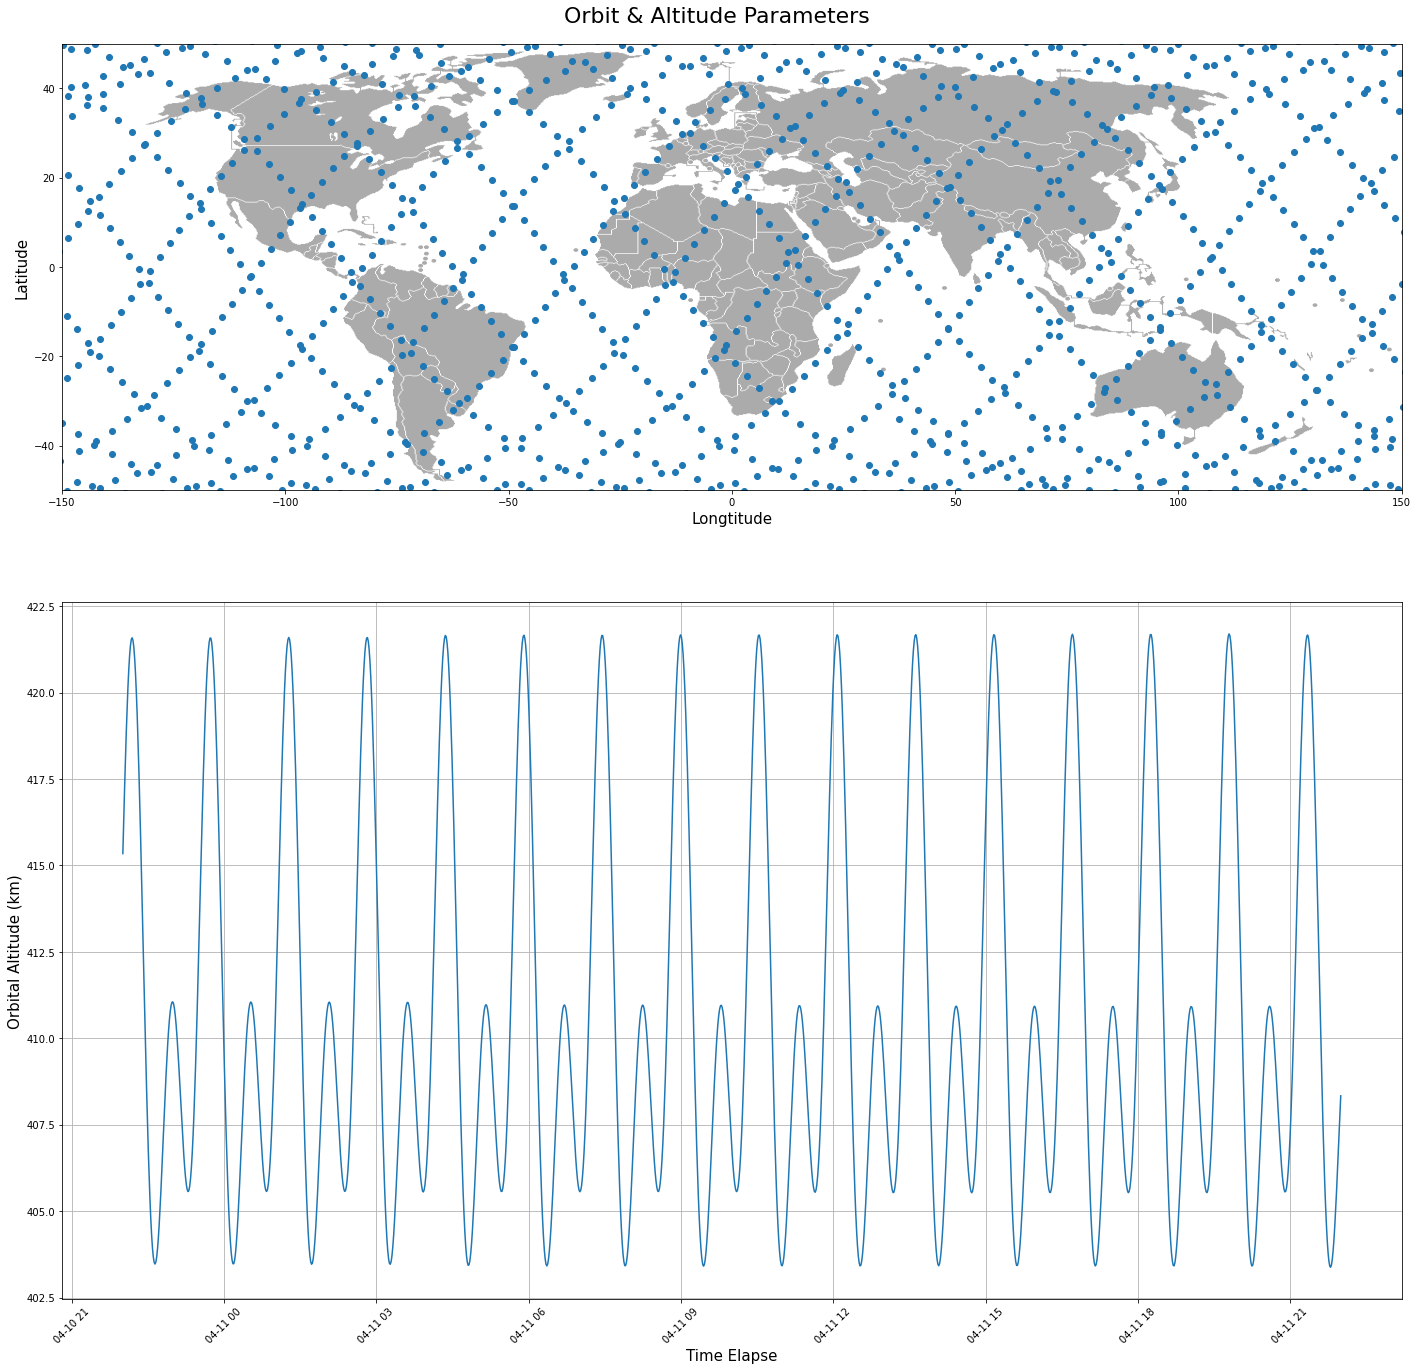

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,20))
fig.suptitle('Orbit & Altitude Parameters', fontsize=22, ha = 'center')

ax1.scatter(issData['Longtitude'], issData['Latitude'])
ax1.set_ylabel('Latitude',fontsize=15)
ax1.set_xlabel('Longtitude', fontsize=15)
    
ax2.plot(issData['Altitude'])
ax2.set_ylabel('Orbital Altitude (km)',fontsize=15)
ax2.set_xlabel('Time Elapse', fontsize=15)

#add picture of Earth in the background since data are Long/Lat
ax1.imshow(testImage, extent = [-150,150,-50,50,])

#rotate tick marks 
plt.setp(ax2.get_xticklabels(), rotation = 45)
ax2.grid()


fig.tight_layout(rect=[0,0.03,0.99,1.07])

plt.show()
#plt.savefig("ISS Orbital Parameters.png", dpi = 700)

The gray – quantity D - Absorbed dose

1 Gy = 1 joule/kilogram – a physical quantity. 1 Gy is the deposit of a joule of radiation energy per kg of matter or tissue.
The sievert – quantity H - Dose equivalent

1 Sv = 1 joule/kilogram – a biological effect. The sievert represents the equivalent biological effect of the deposit of a joule of radiation energy in a kilogram of human tissue. The equivalence to absorbed dose is denoted by Q.

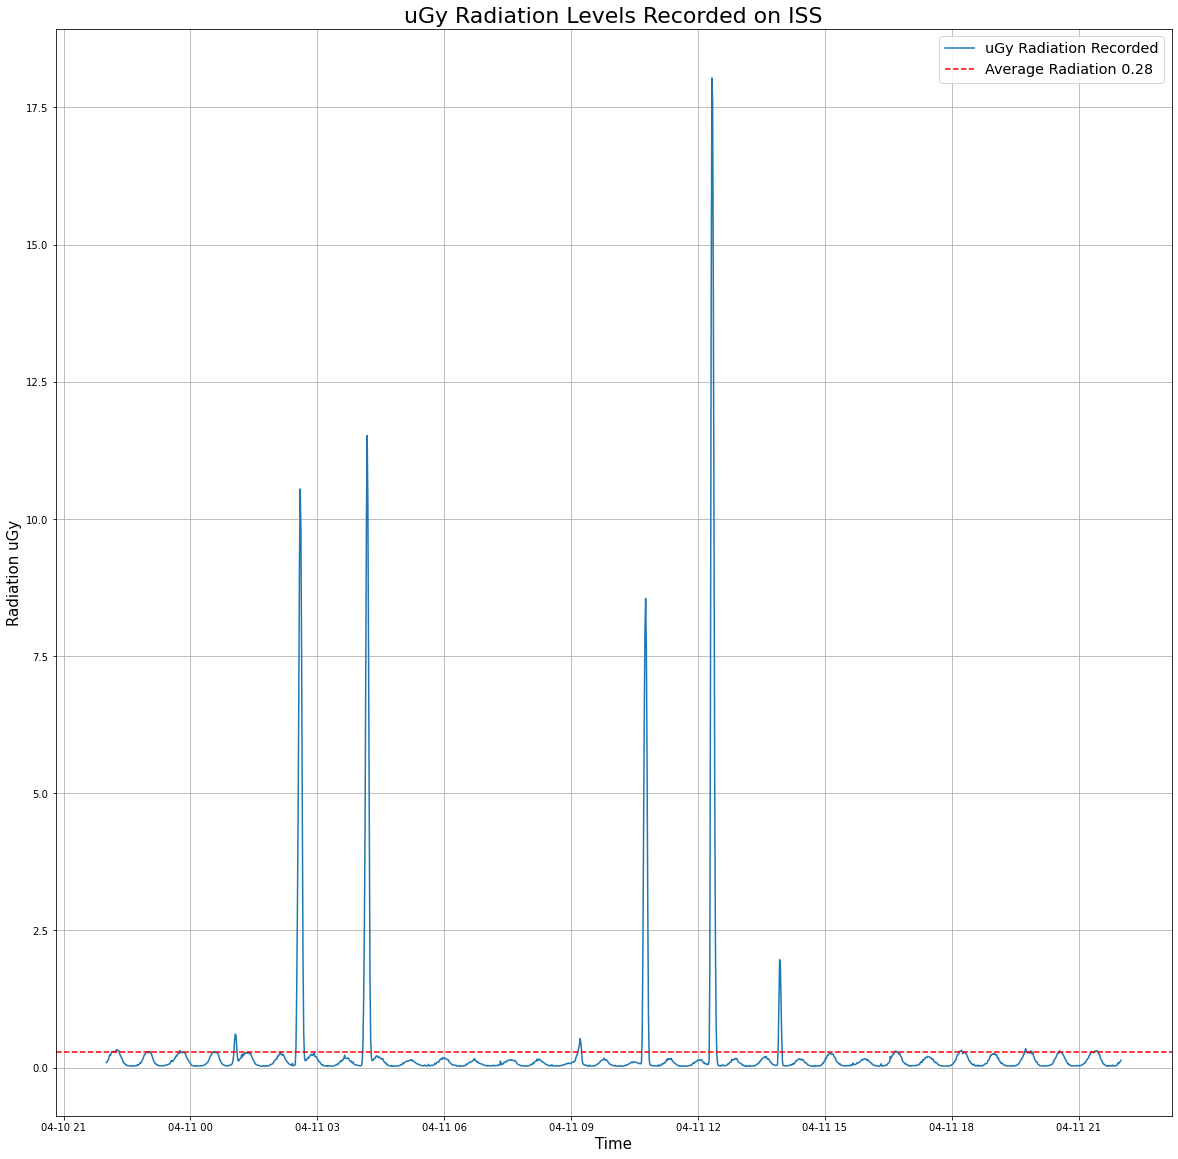

In [33]:
avgRadValue = round(issData['Avg_Dose_Rate'].mean(), 2) #0.28 uGv
#print radiation levels and average value as mask
fig,ax = plt.subplots(figsize=(20,20))
plt.plot(issData['Avg_Dose_Rate']) # lnx is handle for legend
ax.axhline(y=avgRadValue, color='r', linestyle='--')

ax.set_ylabel('Radiation uGy',fontsize=15)
ax.set_xlabel('Time', fontsize=15)
plt.title('uGy Radiation Levels Recorded on ISS', fontsize='22')
    

ax.grid()
ax.legend(['uGy Radiation Recorded', 'Average Radiation '+str(avgRadValue)], fontsize = 'x-large')


plt.show()


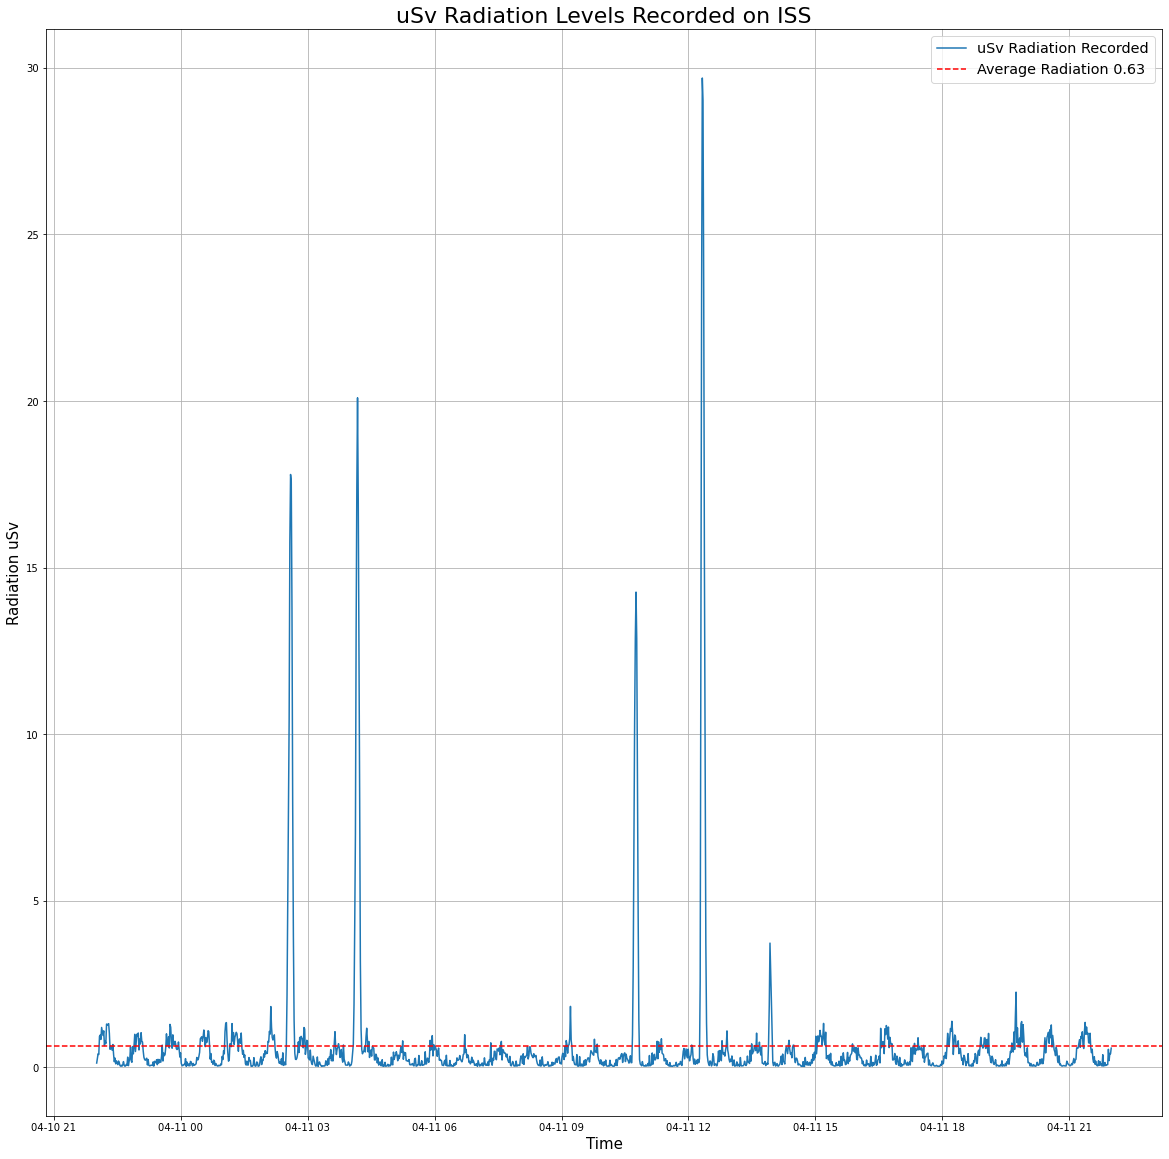

In [19]:
avgRadValue = round(issData['Avg_EQV_Dose_Rate'].mean(), 2) #0.28 uGv
#print radiation levels and average value as mask
fig,ax = plt.subplots(figsize=(20,20))
plt.plot(issData['Avg_EQV_Dose_Rate']) # lnx is handle for legend
ax.axhline(y=avgRadValue, color='r', linestyle='--')

ax.set_ylabel('Radiation uSv',fontsize=15)
ax.set_xlabel('Time', fontsize=15)
plt.title('uSv Radiation Levels Recorded on ISS', fontsize='22')
    

ax.grid()
ax.legend(['uSv Radiation Recorded', 'Average Radiation '+str(avgRadValue)], fontsize = 'x-large')


plt.show()


In [6]:
#create subsets to examine uGy/ uSv Radiation
peakRad = issData.loc[issData["Avg_Dose_Rate"]>= 0.28] #uGy selected
normRad = issData.loc[issData["Avg_Dose_Rate"]<=0.279] #uGy selected

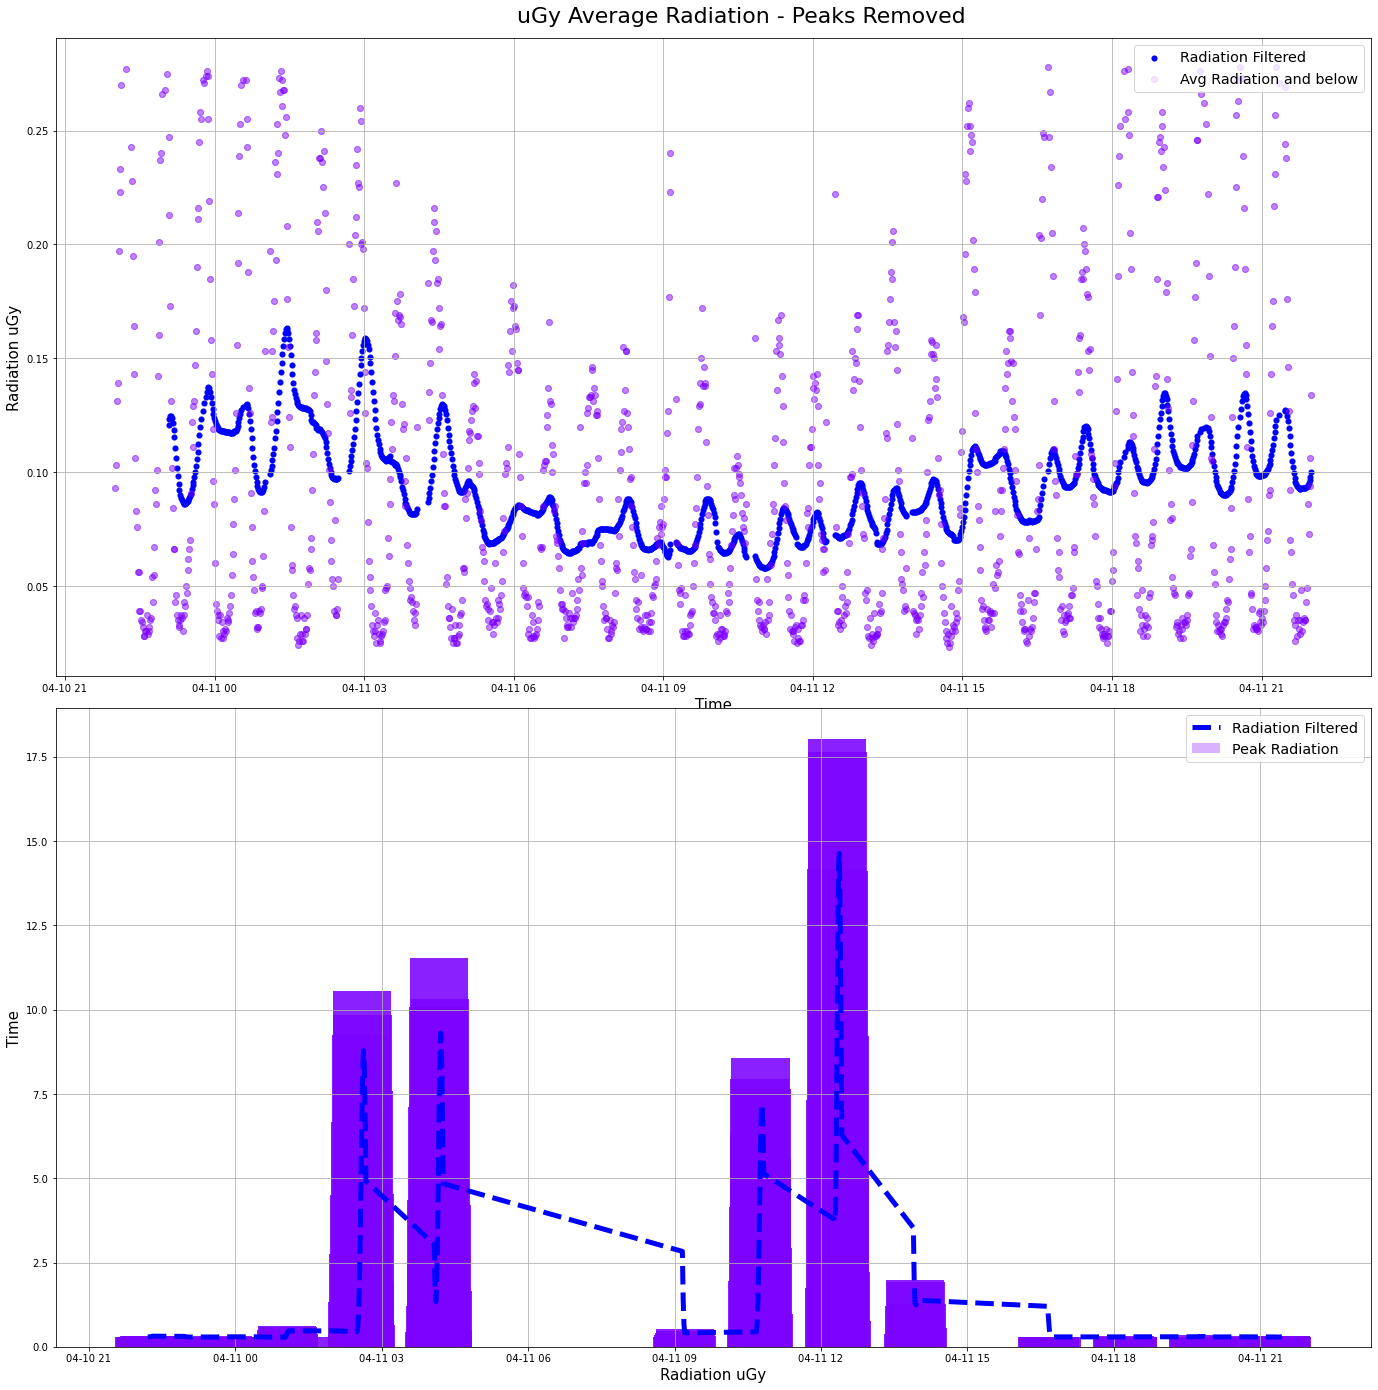

In [34]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(20,20))
fig.suptitle('uGy Average Radiation - Peaks Removed', fontsize=22, ha = 'center')
fig.tight_layout(rect=[0,0.03,0.95,0.99])

colors = iter(cm.rainbow(np.linspace(0, 1, len(normRad.index))))

ax.scatter(normRad.index,normRad['Avg_Dose_Rate'].rolling(window=50).mean() ,linewidths=.1, color='b')

for y in normRad:
    ax.scatter(normRad.index,normRad['Avg_Dose_Rate'], color=next(colors), alpha=.1 )
    
ax.set_ylabel('Radiation uGy', fontsize= '15')
ax.set_xlabel('Time', fontsize = '15')
ax.grid()   
ax.legend(['Radiation Filtered', 'Avg Radiation and below'], fontsize = 'x-large', loc=1)

#secondary plot peaks only
for y in peakRad:
    ax2.bar(peakRad.index,peakRad['Avg_Dose_Rate'], color=next(colors), alpha=.3, width =0.05)

#plt.bar(peakRad.index,peakRad['Avg_Dose_Rate'],width=0.05)
ax2.plot(peakRad.index,peakRad['Avg_Dose_Rate'].rolling(window=5).mean(), 'b--', linewidth=5)
ax2.set_xlabel('Radiation uGy', fontsize= '15')
ax2.set_ylabel('Time', fontsize = '15')
ax2.legend(['Radiation Filtered', 'Peak Radiation'], fontsize = 'x-large', loc=1)

ax2.grid()

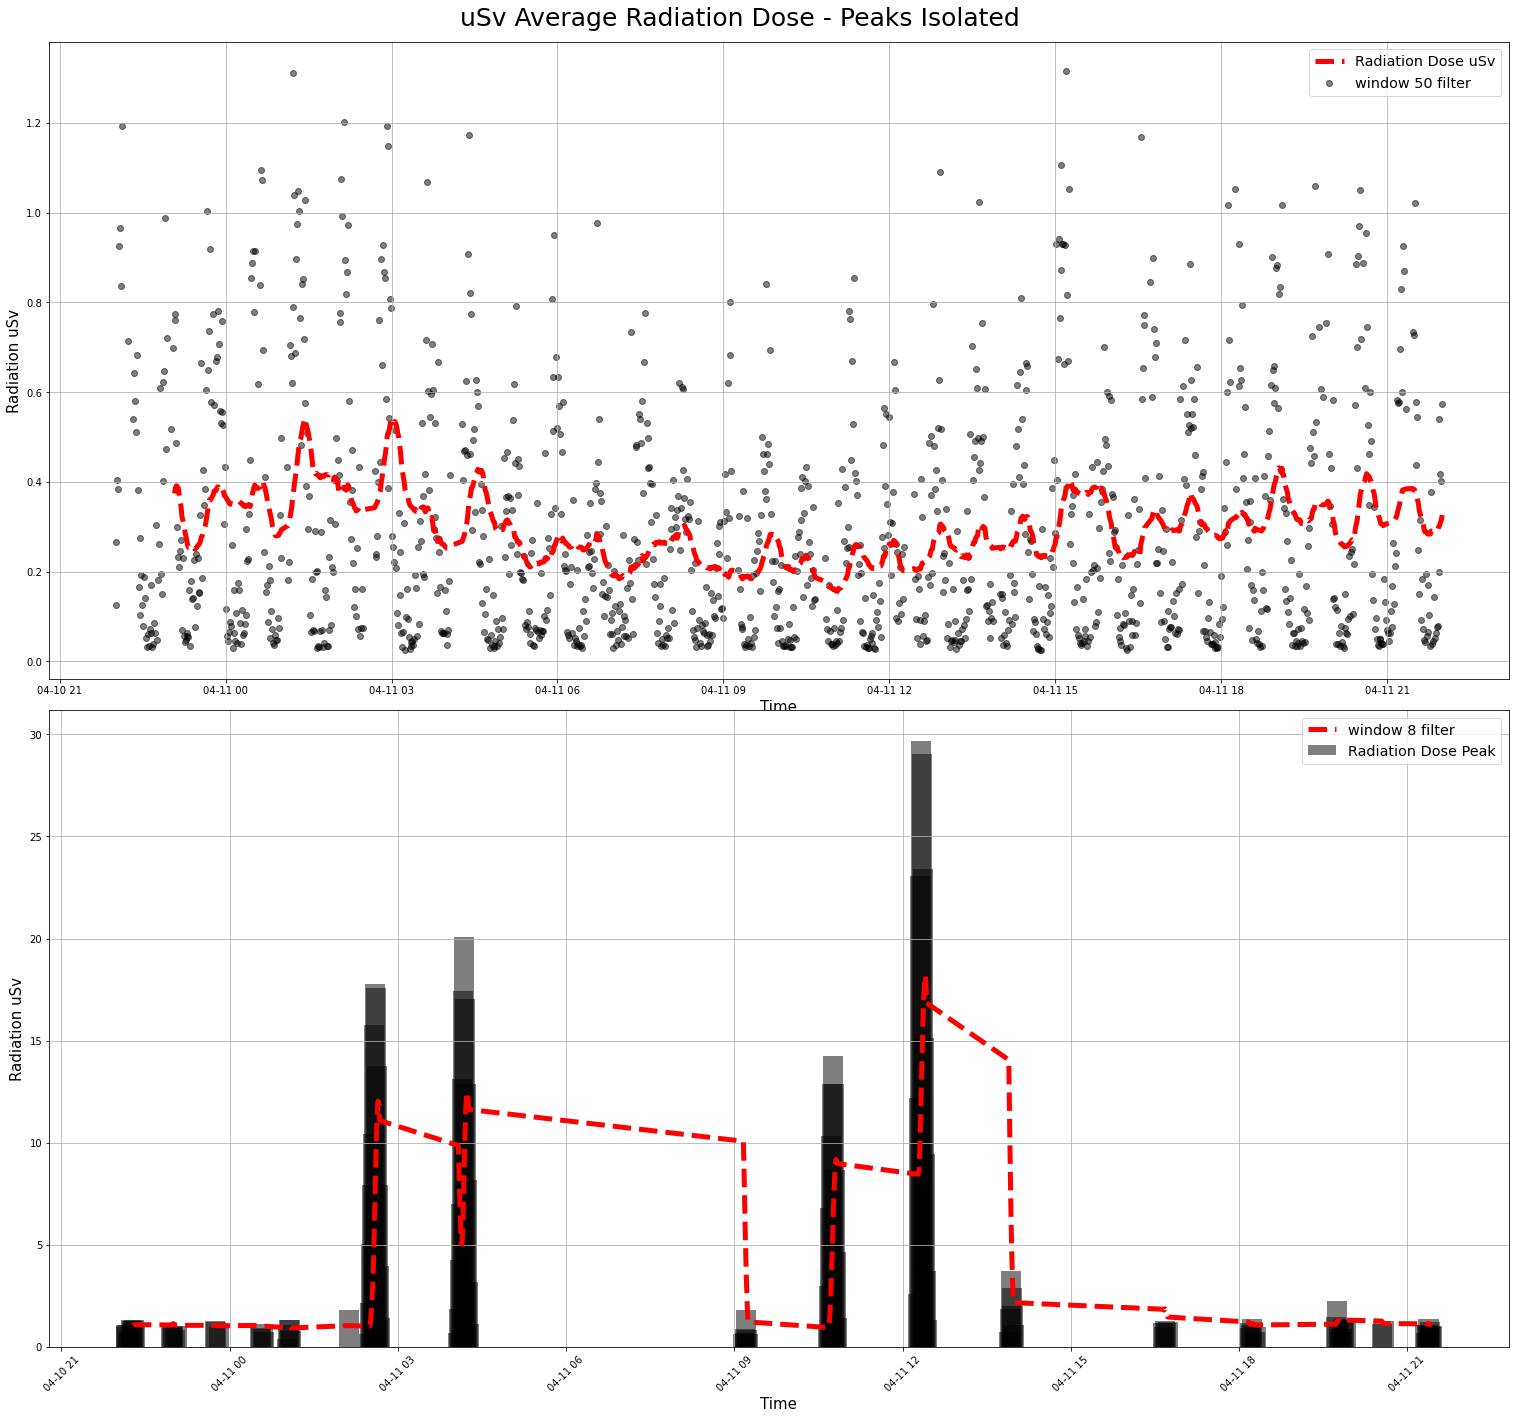

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,20))
fig.suptitle(' uSv Average Radiation Dose - Peaks Isolated', fontsize=25, ha = 'center')
fig.tight_layout(rect=[0.0,0.03,1.05,0.99])

ax1.scatter(normRad.index, normRad['Avg_EQV_Dose_Rate'], color = 'black', alpha=0.5)
ax1.plot(normRad.index, normRad['Avg_EQV_Dose_Rate'].rolling(window=50).mean(), 'r--', linewidth = '5')
ax1.set_ylabel('Radiation uSv',fontsize=15)
ax1.set_xlabel('Time', fontsize=15)
ax1.legend(["Radiation Dose uSv", "window 50 filter"],fontsize = 'x-large')
ax1.grid()
    
ax2.bar(peakRad.index,peakRad['Avg_EQV_Dose_Rate'],width =0.015, color = 'black', alpha=0.5)
ax2.plot(peakRad.index, peakRad['Avg_EQV_Dose_Rate'].rolling(window=8).mean(),'r--', linewidth = '5')
ax2.set_ylabel('Radiation uSv',fontsize=15)
ax2.set_xlabel('Time', fontsize=15)
ax2.legend(["window 8 filter", "Radiation Dose Peak"], fontsize = 'x-large')
ax2.grid()

#rotate tick marks 
plt.setp(ax2.get_xticklabels(), rotation = 45)
plt.show()


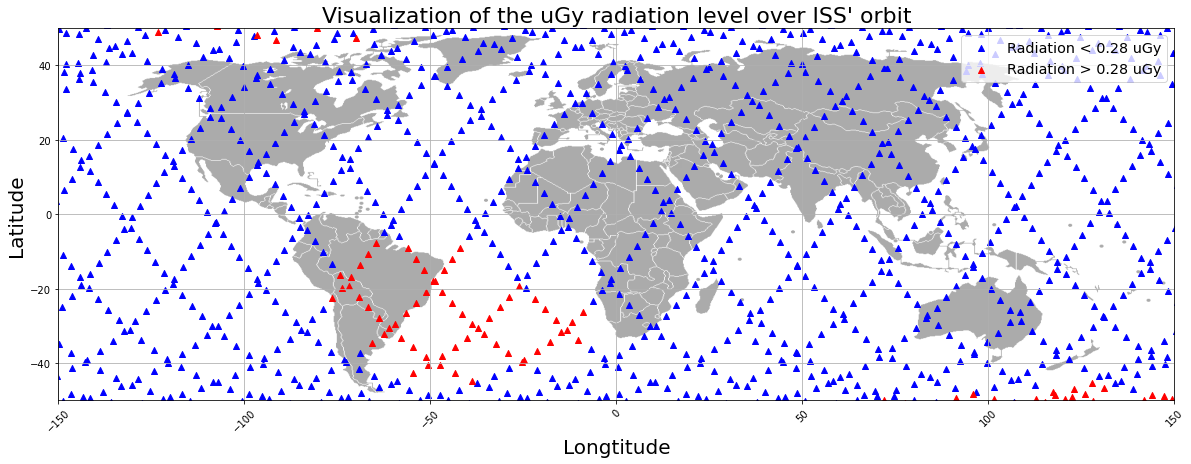

In [9]:

    #fig, axis and plot creation
    fig, ax = plt.subplots(figsize=(20,10))
    
    #plt.imshow(testImage, aspect= 'auto')
    ax.scatter(normRad['Longtitude'], normRad['Latitude'], marker = '^', color = 'blue' )
    ax.scatter(peakRad['Longtitude'], peakRad['Latitude'], marker = '^', color = 'red')
    ax.grid()
    
    #ax.imshow()
    ax.imshow(testImage, extent = [-150,150,-50,50,])
    
    #labels and titles
    ax.set(xlabel = 'Longtitude',
          ylabel = 'Latitude')
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    
    
    #rotate tick marks 
    plt.setp(ax.get_xticklabels(), rotation = 45)
    plt.legend(["Radiation < 0.28 uGy", "Radiation > 0.28 uGy"], fontsize = "x-large", loc = 1)
    plt.title ("Visualization of the uGy radiation level over ISS' orbit", fontsize = 22)
    
    plt.show()
    #fig.savefig(pltName +'.png' ,dpi =700)
    

## Appendix
(functions to be used if useful for further processing)

In [10]:
def smooth(x,window_len=50,window='flat'):
    #Scipy-cookbook

    if x.ndim != 1:
        raise ValueError( "smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError( "Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y




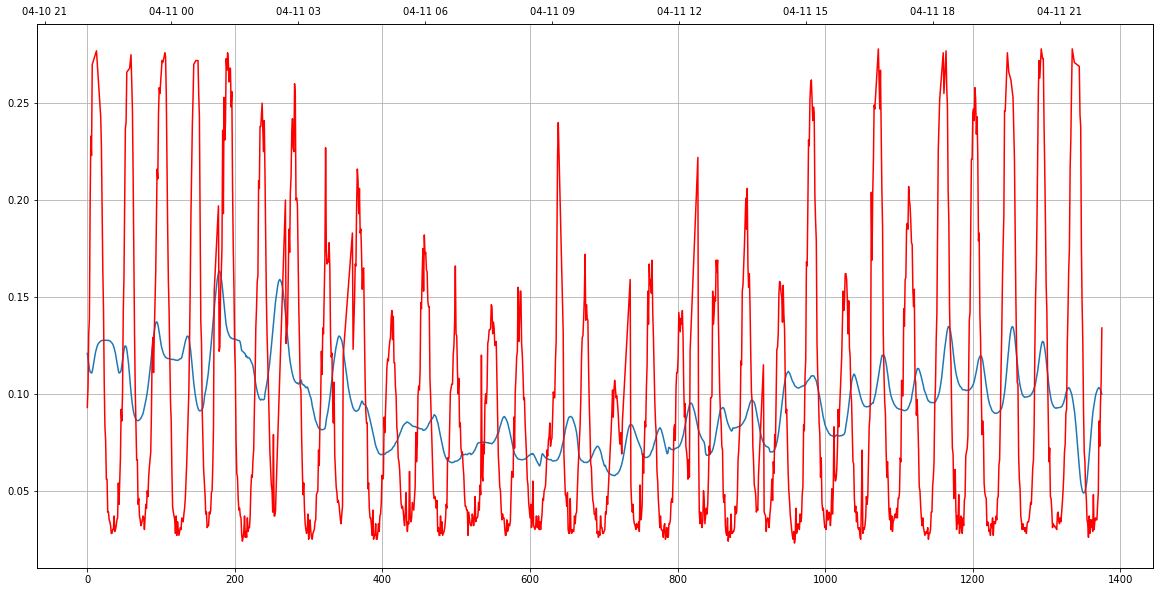

In [11]:
filteredRadNorm = smooth(normRad['Avg_Dose_Rate'])
normRadIndex = np.array([normRad.index])

#fig, axis and plot creation
fig, ax = plt.subplots(figsize=(20,10))
ax1 = ax.twiny()

ax.plot(filteredRadNorm)
ax1.plot(normRad['Avg_Dose_Rate'], 'r')
    
ax.grid()

In [12]:
def plotFunction(xAxis, yAxis, xAxisName, yAxisName, pltName): #dataset.index, dataset["col"], "str", "str", "str"
    
    #fig, axis and plot creation
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(xAxis, yAxis)
    ax.grid()
    
    #labels and titles
    ax.set(xlabel = xAxisName,
          ylabel = yAxisName,
          title = pltName)
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    
    #rotate tick marks 
    plt.setp(ax.get_xticklabels(), rotation = 45)
    
    plt.show()
    